In [ ]:
1 - Basic Use of HDBSCAN

We gonna start with a dataset from sklearn

In [6]:
from sklearn.datasets import make_blobs
import pandas as pd
import hdbscan

In [5]:
blobs, labels = make_blobs(n_samples=2000, n_features=10)
pd.DataFrame(blobs).head()

,0,1,2,3,4,5,6,7,8,9
0,6.204550,1.383419,-10.113104,-7.843952,-4.156659,-8.967303,-8.347564,-1.155629,-7.848178,4.370090
1,7.263863,0.367090,-6.672009,-8.748087,-4.489175,-8.542360,-7.295683,-3.314149,-6.769390,6.156977
2,6.147125,4.956196,-4.257676,2.995759,-8.965092,-2.872971,-11.423011,-6.977810,-4.589338,10.359085
3,4.734566,-11.018950,10.743922,4.943827,-3.183564,-7.575626,2.967148,8.359868,5.816299,7.691495
4,5.377936,-8.403497,7.880824,5.021349,-3.986601,-7.538975,2.962432,8.813705,5.207709,8.972011


Next step is do the simple clustering using the HDBSCAN. The first print is an array with the cluster number of each samples. The second print is the number maximum of clusters in the dataset (in this case there are 3 clusters (0 1 2)). The last print is the number of probabilities, 0 means the element is a noise and 1 means the element is in the center os group. 

In [16]:
clusterer = hdbscan.HDBSCAN()
clusterer.fit(blobs)
print(clusterer.labels_)
print(clusterer.labels_.max())
print(clusterer.probabilities_)

[1 1 2 ... 1 0 1]
2
[0.83645852 0.63496929 0.70662798 ... 0.52929388 0.80333755 0.73371396]


We can use a distance matrix to fit.

In [17]:
from sklearn.metrics.pairwise import pairwise_distances

In [22]:
distance_matrix = pairwise_distances(blobs)
clusterer = hdbscan.HDBSCAN(metric='precomputed')
clusterer.fit(distance_matrix)
clusterer.labels_

array([1, 1, 2, ..., 1, 0, 1], dtype=int64)

2 - Getting more information about a clustering

The image below is the dataset without clustering

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = np.load('clusterable_data.npy')
data, data.shape

(array([[-0.12153499, -0.22876337],
        [-0.22093687, -0.25251088],
        [ 0.1259037 , -0.27314321],
        ...,
        [ 0.50243143, -0.3002958 ],
        [ 0.53822256,  0.19412199],
        [-0.08688887, -0.2092721 ]]),
 (2309, 2))

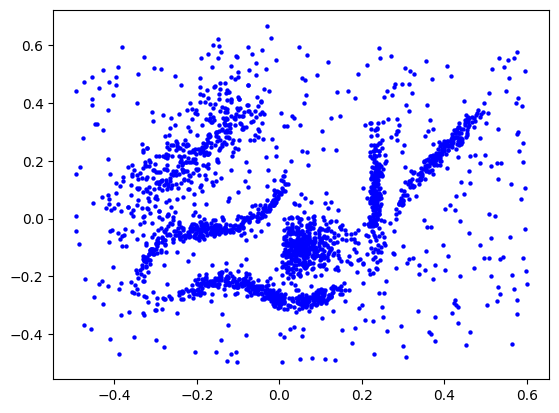

In [58]:
plt.scatter(*data.T, s=10, linewidth=0, c='b', alpha=1)

The image below is the dataset with clustering.

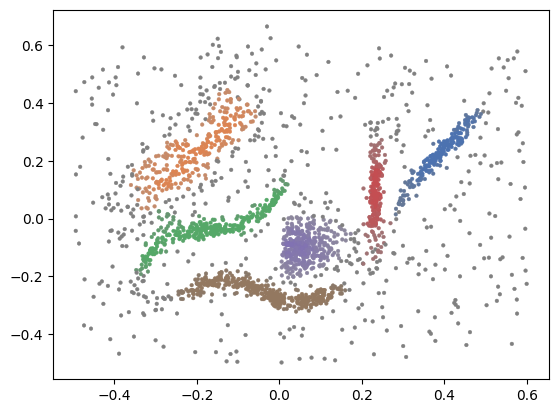

In [86]:
#doing the clustering with a min_number of 15 and fit
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)
color_palette = sns.color_palette('deep', 8)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*data.T, s=7, linewidth=0.3, c=cluster_member_colors, alpha=1)

The figure below is a condensed tree and show the hierarchy clustering and distribution os elements in each cluster. Also, show the clusters selected with an elipse.

<AxesSubplot: ylabel='$\\lambda$ value'>

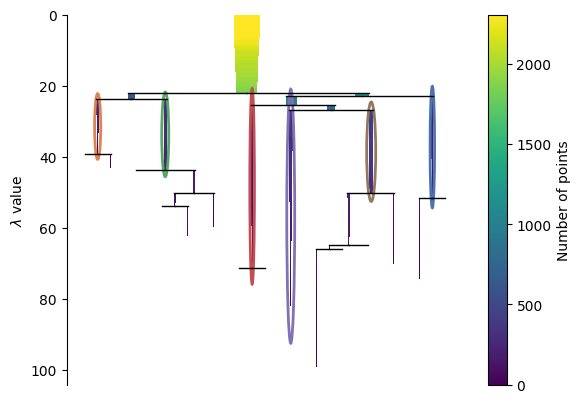

In [87]:
clusterer.condensed_tree_.plot(select_clusters=True,
                            selection_palette=sns.color_palette('deep', 8))

array([ 0, -1,  0, ..., -1, -1,  0], dtype=int64)

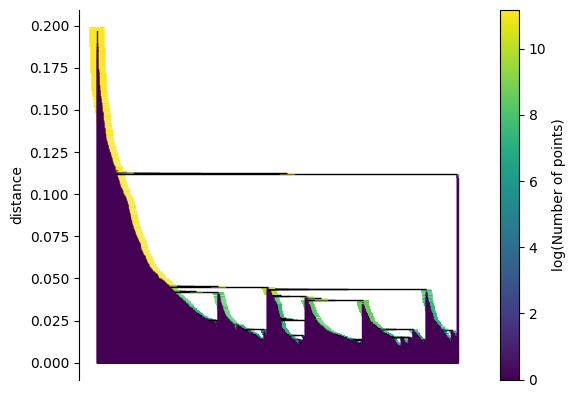

In [88]:
clusterer.single_linkage_tree_.plot(),
clusterer.single_linkage_tree_.get_clusters(0.023, min_cluster_size=2)

3- Parameter Selection for HDBSCAN

There are a lot parameters in HDBSCAN, but only some are importants. 

3.1 - min_cluster_size

The min_cluster_size is the most important parameter in the HDBSCAN, because it's the minimum number of elements that become a cluster.

In [101]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
digits = load_digits()
data = digits.data
projection= TSNE().fit_transform(data)

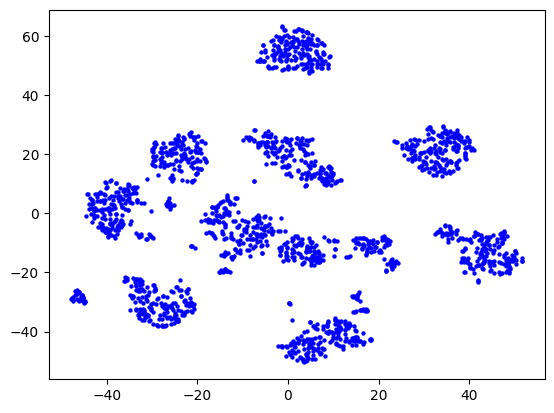

In [104]:
plt.scatter(*projection.T, s=10, linewidth=0, c='b', alpha=1)

11

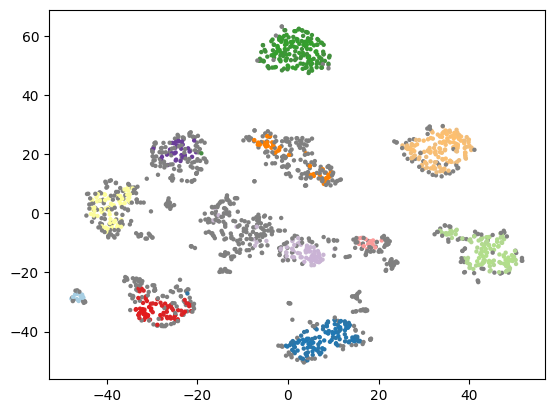

In [114]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T,s=10, linewidth=0,alpha=1,c=cluster_member_colors)
clusterer.labels_.max()

7

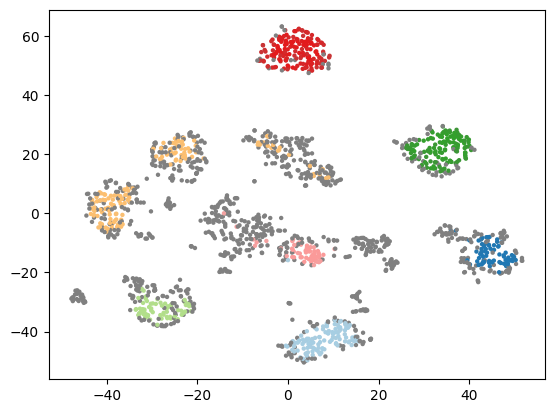

In [113]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T,s=10, linewidth=0,alpha=1,c=cluster_member_colors)
clusterer.labels_.max()

2

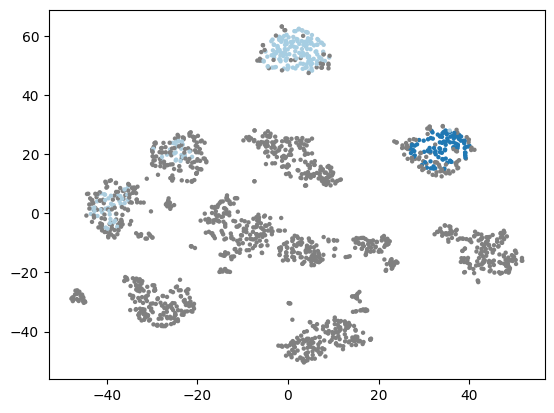

In [115]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=60).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T,s=10, linewidth=0,alpha=1,c=cluster_member_colors)
clusterer.labels_.max()

10

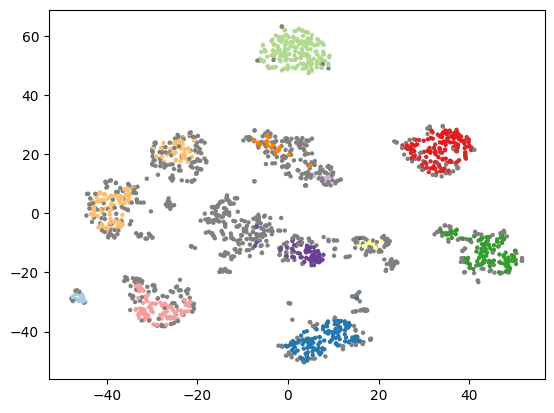

In [133]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=13).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T,s=10, linewidth=0,alpha=1,c=cluster_member_colors)
clusterer.labels_.max()